In [ ]:
import pandas as pd
import numpy as np

In [ ]:
file_data = pd.read_csv("football_data.csv",encoding='latin1')
file_data.shape

(18207, 89)

# Cleaning the data

In [ ]:
# removing rows with wrong placement of data and empty entries
indexes = []
for index,rows in file_data.iterrows():
  if rows['Club Logo'][:5] !='https' or rows['LS'] != rows['LS']:
    indexes.append(index)
print(len(indexes))
file_data = file_data.drop(file_data.index[indexes])
file_data.reset_index(drop=True, inplace=True)
file_data_copy = file_data
file_data.shape

2085


(16122, 89)

In [ ]:
#select columns which are useful numerical values
positions = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB',
             'LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']
useful = ['Age', 'Overall','Potential','Value','Wage','Special','International Reputation','Skill Moves',
          'Height','Weight','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve',
          'FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance',
          'ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning',
          'Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling',
          'GKKicking','GKPositioning','GKReflexes']
useful.extend(positions)
# print(positions)
file_data = file_data[useful]

In [ ]:
import re
def modifyValue(val):
  if val != val:
    return 0
  if type(val) == str:
    val = re.sub('[^A-Z0-9\.]', '', val)
    # val = val[7:]
    last = val[-1]
    if last not in ['K','M']:
      return 0
    val = val[:-1]
    val = float(val)
    val *=1000
    if last == 'M':
      val *= 1000
    return val
  return val 

file_data['Value'] = file_data['Value'].apply(modifyValue)
print(file_data['Value']) 
file_data['Wage'] = file_data['Wage'].apply(modifyValue)  
print(file_data['Wage'])

0        110500000.0
1         77000000.0
2        118500000.0
3        102000000.0
4         93000000.0
            ...     
16117        60000.0
16118        60000.0
16119        60000.0
16120        60000.0
16121        60000.0
Name: Value, Length: 16122, dtype: float64
0        565000.0
1        405000.0
2        290000.0
3        355000.0
4        340000.0
           ...   
16117      1000.0
16118      1000.0
16119      1000.0
16120      1000.0
16121      1000.0
Name: Wage, Length: 16122, dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
def modifyHeight(val):
  # print(val)
  val = val.split('\'')
  val = float(val[0])*12 + float(val[1])
  return val

file_data['Height'] = file_data['Height'].apply(modifyHeight)
print(file_data['Height'])  

0        67.0
1        74.0
2        69.0
3        71.0
4        68.0
         ... 
16117    69.0
16118    75.0
16119    68.0
16120    70.0
16121    70.0
Name: Height, Length: 16122, dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
def modifyWeight(weight):
  if type(weight) == str:
    weight = weight.replace('lbs','')
    return float(weight)

file_data['Weight'] = file_data['Weight'].apply(modifyWeight)
print(file_data['Weight'])

0        159.0
1        183.0
2        150.0
3        154.0
4        163.0
         ...  
16117    134.0
16118    170.0
16119    148.0
16120    154.0
16121    176.0
Name: Weight, Length: 16122, dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
def position(val):
  # print(val)
  val = val.split('+')
  val = float(val[0]) + float(val[1])
  return val

for pos in positions:
  file_data[pos] = file_data[pos].apply(position)
print(file_data['LS'])    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        90.0
1        94.0
2        87.0
3        85.0
4        86.0
         ... 
16117    44.0
16118    47.0
16119    47.0
16120    49.0
16121    45.0
Name: LS, Length: 16122, dtype: float64


<!-- # PCA -->

In [ ]:
# from sklearn.decomposition import PCA
# x = file_data
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
# finalDf = pd.concat([principalDf,   [['Name']]], axis = 1)

# import matplotlib.pyplot as plt
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
# targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# colors = ['r', 'g', 'b']
# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['Name'] == target
#     ax.scatter(finalDf.ix[indicesToKeep, 'principal component 1']
#                , finalDf.ix[indicesToKeep, 'principal component 2']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()


In [ ]:
# from sklearn.preprocessing import StandardScaler

# X = file_data.values
# X = StandardScaler().fit_transform(X)

In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(X)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])


In [ ]:
# # plotting PCA
# plt.figure(figsize=(6, 6))
# plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'])
# # plt.xlabel('Weight in lbs')
# # plt.ylabel('Finishing score')
# plt.title('Visualization of PCA data')

# Plotting histogram of players by age, height and weight

<Figure size 720x720 with 0 Axes>

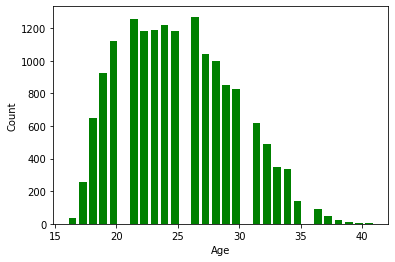

<Figure size 720x720 with 0 Axes>

In [ ]:
# histogram accodring to age
import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure
from pylab import rcParams
age = file_data['Age']
plt.hist(age, density=False, bins=30,color='green',rwidth=0.75)  # `density=True` would make probability
plt.ylabel('Count')
plt.xlabel('Age');
# plt.plot()
plt.figure(figsize=(10, 10))

<Figure size 720x720 with 0 Axes>

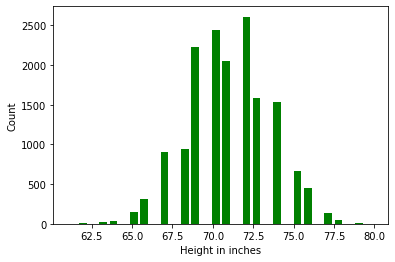

<Figure size 720x720 with 0 Axes>

In [ ]:
height = file_data['Height']
plt.hist(height, density=False, bins=30,color='green',rwidth=0.75)  # `density=True` would make probability
plt.ylabel('Count')
plt.xlabel('Height in inches');
# plt.plot()
plt.figure(figsize=(10, 10))

<Figure size 720x720 with 0 Axes>

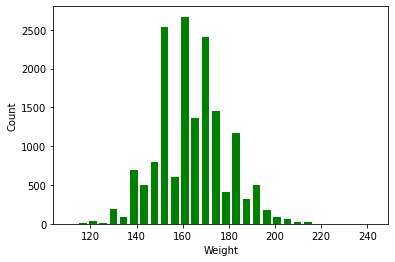

<Figure size 720x720 with 0 Axes>

In [ ]:
weight = file_data['Weight']
plt.hist(weight, density=False, bins=30,color='green',rwidth=0.75)  # `density=True` would make probability
plt.ylabel('Count')
plt.xlabel('Weight');
# plt.plot()
plt.figure(figsize=(10, 10))

# Plotting histogram of players by Nationality

<Figure size 720x720 with 0 Axes>

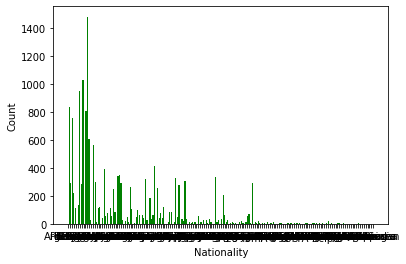

<Figure size 720x720 with 0 Axes>

In [ ]:
nationality = file_data_copy['Nationality']
plt.hist(nationality, bins=200, color='green',rwidth=0.75)  # `density=True` would make probability
plt.ylabel('Count')
plt.xlabel('Nationality');
# plt.plot()
plt.figure(figsize=(10, 10))

# Scatter plot of certain parameters vs finishing

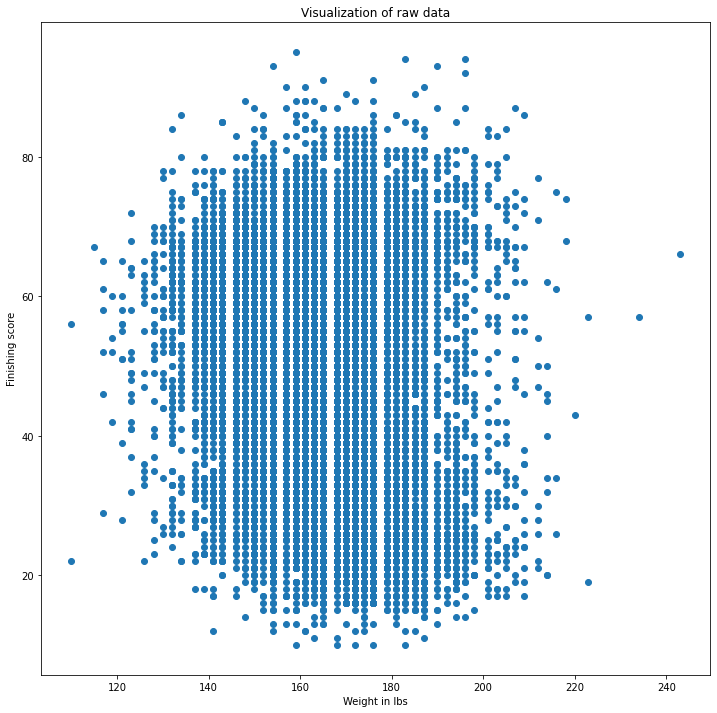

In [ ]:
import matplotlib.pyplot as plt
import re
finishing = file_data['Finishing']
weight = file_data['Weight']
# weight = weight.apply(modifyWeight)    
plt.figure(figsize=(12, 12))
plt.scatter(weight, finishing)
plt.xlabel('Weight in lbs')
plt.ylabel('Finishing score')
plt.title('Visualization of raw data');

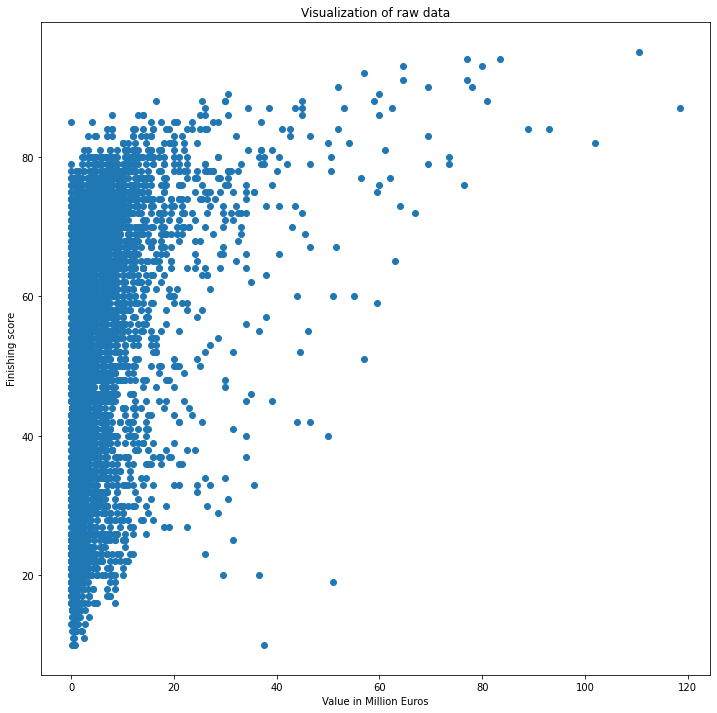

In [ ]:
value = file_data['Value']/1000000
# weight = weight.apply(modifyWeight)    
plt.figure(figsize=(12, 12))
plt.scatter(value, finishing)
plt.xlabel('Value in Million Euros')
plt.ylabel('Finishing score')
plt.title('Visualization of raw data');